In [114]:
import os
import h5py
import numba
import numpy as np
import pandas as pd
import scipy.integrate
import matplotlib as mpl
import matplotlib.pyplot as plt
from hoki.utils.exceptions import HokiFormatError
from pylab import cm
from scipy.optimize import fminbound
import matplotlib.ticker as ticker
from cycler import cycler
import seaborn as sns

In [169]:
plt.rc('text', usetex=False)
plt.rc('font', family='serif')
plt.rcParams.update({'font.size': 16})
plt.rcParams['axes.linewidth'] = 2
plt.rcParams['axes.prop_cycle'] = cycler(color=sns.color_palette('deep'))

In [170]:
data = h5py.File(f"/Users/dillon/Desktop/data.h5", "r")
observations = data['observations']

obs_Ia = observations['Ia']
obs_CCSN = observations['CCSN']
obs_LGRB = observations['LGRB']
obs_PISN = observations['PISN']

In [171]:
event_rates = data['event_rates']
h = event_rates.attrs['h']

In [172]:
TNG_100_100 = h5py.File("/Users/dillon/Desktop/100_100/TNG_100_100.h5", "r")
TNG_100_300 = h5py.File("/Users/dillon/Desktop/100_300/TNG_100_300.h5", "r")
TNG_135_100 = h5py.File("/Users/dillon/Desktop/135_100/TNG_135_100.h5", "r")
TNG_135_300 = h5py.File("/Users/dillon/Desktop/135_300/TNG_135_300.h5", "r")
TNG_135all_100 = h5py.File("/Users/dillon/Desktop/135all_100/TNG_135all_100.h5", "r")
TNG_170_100 = h5py.File("/Users/dillon/Desktop/170_100/TNG_170_100.h5", "r")
TNG_170_300 = h5py.File("/Users/dillon/Desktop/170_300/TNG_170_300.h5", "r")

In [173]:
empmodel_100_100 = h5py.File("/Users/dillon/Desktop/100_100/empmodel_100_100.h5", "r")
empmodel_100_300 = h5py.File("/Users/dillon/Desktop/100_300/empmodel_100_300.h5", "r")
empmodel_135_100 = h5py.File("/Users/dillon/Desktop/135_100/empmodel_135_100.h5", "r")
empmodel_135_300 = h5py.File("/Users/dillon/Desktop/135_300/empmodel_135_300.h5", "r")
empmodel_135all_100 = h5py.File("/Users/dillon/Desktop/135all_100/empmodel_135all_100.h5", "r")
empmodel_170_100 = h5py.File("/Users/dillon/Desktop/170_100/empmodel_170_100.h5", "r")
empmodel_170_300 = h5py.File("/Users/dillon/Desktop/170_300/empmodel_170_300.h5", "r")


In [174]:
def set_plot_params(ax):
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='in', right=True)
    ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='in', right=True)
    ax.yaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=12))
    ax.yaxis.set_tick_params(which='both', right=False)

    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', top='on')
    ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in', top='on')
    ax.xaxis.set_tick_params(which='both', top=False)
    ax.xaxis.set_major_locator(mpl.ticker.MultipleLocator(2))
    ax.xaxis.set_minor_locator(mpl.ticker.MultipleLocator(1))


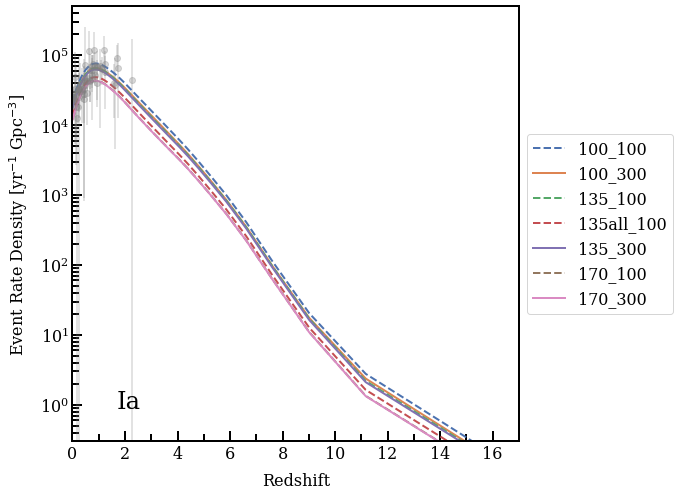

In [175]:
plt.figure(figsize=(8, 8))
plt.xlim(0, 17)
plt.ylim(3e-1, 5e5)
plt.yscale('log')
plt.ylabel(r"Event Rate Density [yr$^{-1}$ Gpc$^{-3}$]", labelpad=10)
plt.xlabel('Redshift', labelpad=10)

ax = plt.gca()
set_plot_params(ax)

plt.plot(empmodel_100_100['redshift_edges'][:-1], empmodel_100_100['Ia_rates'], '--', label='100_100', lw=2)
plt.plot(empmodel_100_300['redshift_edges'][:-1], empmodel_100_300['Ia_rates'], label='100_300', lw=2)
plt.plot(empmodel_135_100['redshift_edges'][:-1], empmodel_135_100['Ia_rates'], '--', label='135_100', lw=2)
plt.plot(empmodel_135all_100['redshift_edges'][:-1], empmodel_135all_100['Ia_rates'], '--', label='135all_100', lw=2)
plt.plot(empmodel_135_300['redshift_edges'][:-1], empmodel_135_300['Ia_rates'], label='135_300', lw=2)
plt.plot(empmodel_170_100['redshift_edges'][:-1], empmodel_170_100['Ia_rates'], '--', label='170_100', lw=2)
plt.plot(empmodel_170_300['redshift_edges'][:-1], empmodel_170_300['Ia_rates'], label='170_300', lw=2)

ax.errorbar(
    np.array(obs_Ia['mean_z']),
    np.array(obs_Ia['rate']) * h**3,
    xerr=[obs_Ia['lower_z'], obs_Ia['upper_z']],
    yerr=[obs_Ia['lower_rate'] * h**3, obs_Ia['upper_rate'] * h**3],
    fmt="o",
    ms=6,
    alpha=0.3,
    color='grey'
)

plt.legend(loc='center left', bbox_to_anchor=(1, 0.5))

ax.text(0.1, 0.075, "Ia", transform=ax.transAxes, fontsize=24)

plt.show()


In [176]:
peak_100_100 = empmodel_100_100['redshift_edges'][:-1][np.argmax(empmodel_100_100['Ia_rates'])]
peak_100_300 = empmodel_100_300['redshift_edges'][:-1][np.argmax(empmodel_100_300['Ia_rates'])]
peak_135_100 = empmodel_135_100['redshift_edges'][:-1][np.argmax(empmodel_135_100['Ia_rates'])]
peak_135all_100 = empmodel_135all_100['redshift_edges'][:-1][np.argmax(empmodel_135all_100['Ia_rates'])]
peak_135_300 = empmodel_135_300['redshift_edges'][:-1][np.argmax(empmodel_135_300['Ia_rates'])]
peak_170_100 = empmodel_170_100['redshift_edges'][:-1][np.argmax(empmodel_170_100['Ia_rates'])]
peak_170_300 = empmodel_170_300['redshift_edges'][:-1][np.argmax(empmodel_170_300['Ia_rates'])]

print(f"Peak for 100_100: {peak_100_100}")
print(f"Peak for 100_300: {peak_100_300}")
print(f"Peak for 135_100: {peak_135_100}")
print(f"Peak for 135all_100: {peak_135all_100}")
print(f"Peak for 135_300: {peak_135_300}")
print(f"Peak for 170_100: {peak_170_100}")
print(f"Peak for 170_300: {peak_170_300}")


Peak for 100_100: 0.8876471430910174
Peak for 100_300: 0.8876471430910174
Peak for 135_100: 0.8876471430910174
Peak for 135all_100: 0.8876471430910174
Peak for 135_300: 0.8876471430910174
Peak for 170_100: 0.8580880969464915
Peak for 170_300: 0.8580880969464915


In [177]:
average_peak_redshift = np.mean([
    peak_100_100, peak_100_300, peak_135_100,
    peak_135all_100, peak_135_300, peak_170_100, peak_170_300
])

print(f"Average Peak Redshift: {average_peak_redshift}")

Average Peak Redshift: 0.8792017013354385


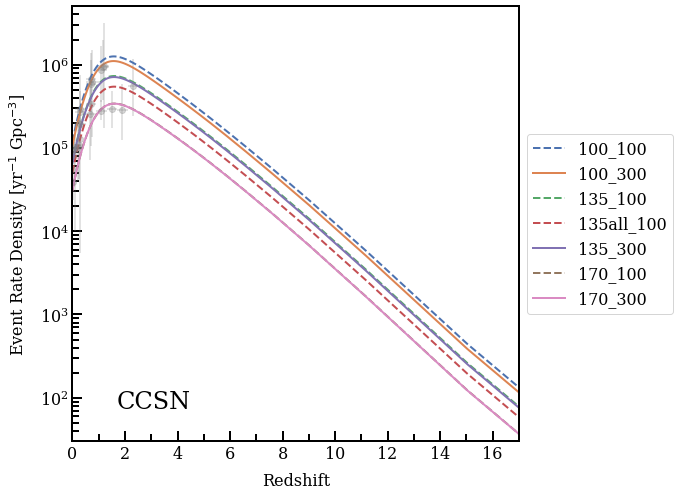

In [178]:
plt.figure(figsize=(8, 8))
plt.xlim(0, 17)
plt.ylim(3e1, 5e6)
plt.yscale('log')
plt.ylabel(r"Event Rate Density [yr$^{-1}$ Gpc$^{-3}$]", labelpad=10)
plt.xlabel('Redshift', labelpad=10)

ax = plt.gca()
set_plot_params(ax)


plt.plot(empmodel_100_100['redshift_edges'][:-1], empmodel_100_100['CCSN_rates'], '--', label='100_100', lw=2)
plt.plot(empmodel_100_300['redshift_edges'][:-1], empmodel_100_300['CCSN_rates'], label='100_300', lw=2)
plt.plot(empmodel_135_100['redshift_edges'][:-1], empmodel_135_100['CCSN_rates'], '--', label='135_100', lw=2)
plt.plot(empmodel_135all_100['redshift_edges'][:-1], empmodel_135all_100['CCSN_rates'], '--', label='135all_100', lw=2)
plt.plot(empmodel_135_300['redshift_edges'][:-1], empmodel_135_300['CCSN_rates'], label='135_300', lw=2)
plt.plot(empmodel_170_100['redshift_edges'][:-1], empmodel_170_100['CCSN_rates'], '--', label='170_100', lw=2)
plt.plot(empmodel_170_300['redshift_edges'][:-1], empmodel_170_300['CCSN_rates'], label='170_300', lw=2)




ax.errorbar(
            np.array(obs_CCSN['mean_z']),
            np.array(obs_CCSN['rate']) * h**3,
            xerr= [obs_CCSN['lower_z'], obs_CCSN['upper_z']],
            yerr=[obs_CCSN['lower_rate'] * h**3, obs_CCSN['upper_rate'] * h**3],
            fmt="o",
            ms=6,
            alpha=0.3,
            color= 'grey'
    )


plt.legend( loc='center left', bbox_to_anchor=(1, 0.5))

ax.text(0.1, 0.075, "CCSN", transform=ax.transAxes,fontsize=24)

plt.show()

In [179]:
peak_100_100 = empmodel_100_100['redshift_edges'][:-1][np.argmax(empmodel_100_100['CCSN_rates'])]
peak_100_300 = empmodel_100_300['redshift_edges'][:-1][np.argmax(empmodel_100_300['CCSN_rates'])]
peak_135_100 = empmodel_135_100['redshift_edges'][:-1][np.argmax(empmodel_135_100['CCSN_rates'])]
peak_135all_100 = empmodel_135all_100['redshift_edges'][:-1][np.argmax(empmodel_135all_100['CCSN_rates'])]
peak_135_300 = empmodel_135_300['redshift_edges'][:-1][np.argmax(empmodel_135_300['CCSN_rates'])]
peak_170_100 = empmodel_170_100['redshift_edges'][:-1][np.argmax(empmodel_170_100['CCSN_rates'])]
peak_170_300 = empmodel_170_300['redshift_edges'][:-1][np.argmax(empmodel_170_300['CCSN_rates'])]

print(f"Peak for 100_100: {peak_100_100}")
print(f"Peak for 100_300: {peak_100_300}")
print(f"Peak for 135_100: {peak_135_100}")
print(f"Peak for 135all_100: {peak_135all_100}")
print(f"Peak for 135_300: {peak_135_300}")
print(f"Peak for 170_100: {peak_170_100}")
print(f"Peak for 170_300: {peak_170_300}")


Peak for 100_100: 1.5586847070687158
Peak for 100_300: 1.5586847070687158
Peak for 135_100: 1.5586847070687158
Peak for 135all_100: 1.5586847070687158
Peak for 135_300: 1.5586847070687158
Peak for 170_100: 1.6196770408766143
Peak for 170_300: 1.6196770408766143


In [167]:
average_peak_redshift = np.mean([
    peak_100_100, peak_100_300, peak_135_100,
    peak_135all_100, peak_135_300, peak_170_100, peak_170_300
])

print(f"Average Peak Redshift: {average_peak_redshift}")

Average Peak Redshift: 1.5761110881566869


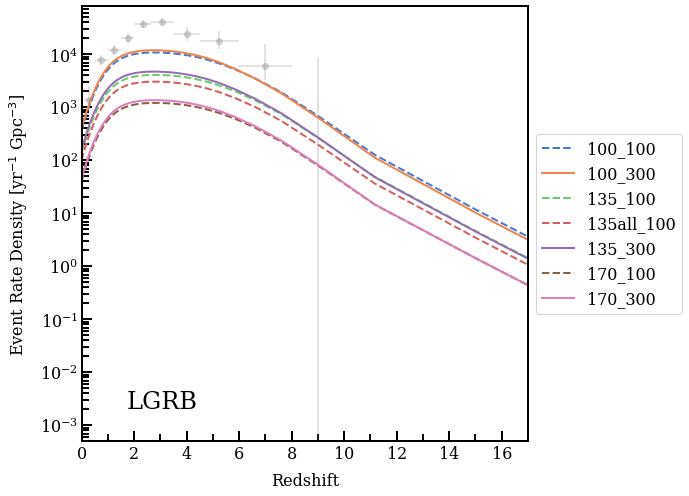

In [168]:
plt.figure(figsize=(8, 8))
plt.xlim(0, 17)
plt.ylim(3e1, 5e6)
plt.yscale('log')
plt.ylabel(r"Event Rate Density [yr$^{-1}$ Gpc$^{-3}$]", labelpad=10)
plt.xlabel('Redshift', labelpad=10)

ax = plt.gca()
set_plot_params(ax)


plt.plot(empmodel_100_100['redshift_edges'][:-1], empmodel_100_100['LGRB_rates'], '--', label='100_100', lw=2)
plt.plot(empmodel_100_300['redshift_edges'][:-1], empmodel_100_300['LGRB_rates'], label='100_300', lw=2)
plt.plot(empmodel_135_100['redshift_edges'][:-1], empmodel_135_100['LGRB_rates'], '--', label='135_100', lw=2)
plt.plot(empmodel_135all_100['redshift_edges'][:-1], empmodel_135all_100['LGRB_rates'], '--', label='135all_100', lw=2)
plt.plot(empmodel_135_300['redshift_edges'][:-1], empmodel_135_300['LGRB_rates'], label='135_300', lw=2)
plt.plot(empmodel_170_100['redshift_edges'][:-1], empmodel_170_100['LGRB_rates'], '--', label='170_100', lw=2)
plt.plot(empmodel_170_300['redshift_edges'][:-1], empmodel_170_300['LGRB_rates'], label='170_300', lw=2)




ax.errorbar(
            np.array(obs_LGRB['mean_z']),
            np.array(obs_LGRB['rate']) * h**3,
            xerr= [obs_LGRB['lower_z'], obs_LGRB['upper_z']],
            yerr=[obs_LGRB['lower_rate'] * h**3, obs_LGRB['upper_rate'] * h**3],
            fmt="o",
            ms=6,
            alpha=0.3,
            color= 'grey'
    )


plt.ylim(5e-4, 8e4)

plt.legend( loc='center left', bbox_to_anchor=(1, 0.5))

ax.text(0.1, 0.075, "LGRB", transform=ax.transAxes,fontsize=24)

plt.show()

In [23]:
peak_100_100 = empmodel_100_100['redshift_edges'][:-1][np.argmax(empmodel_100_100['LGRB_rates'])]
peak_100_300 = empmodel_100_300['redshift_edges'][:-1][np.argmax(empmodel_100_300['LGRB_rates'])]
peak_135_100 = empmodel_135_100['redshift_edges'][:-1][np.argmax(empmodel_135_100['LGRB_rates'])]
peak_135all_100 = empmodel_135all_100['redshift_edges'][:-1][np.argmax(empmodel_135all_100['LGRB_rates'])]
peak_135_300 = empmodel_135_300['redshift_edges'][:-1][np.argmax(empmodel_135_300['LGRB_rates'])]
peak_170_100 = empmodel_170_100['redshift_edges'][:-1][np.argmax(empmodel_170_100['LGRB_rates'])]
peak_170_300 = empmodel_170_300['redshift_edges'][:-1][np.argmax(empmodel_170_300['LGRB_rates'])]

print(f"Peak for 100_100: {peak_100_100}")
print(f"Peak for 100_300: {peak_100_300}")
print(f"Peak for 135_100: {peak_135_100}")
print(f"Peak for 135all_100: {peak_135all_100}")
print(f"Peak for 135_300: {peak_135_300}")
print(f"Peak for 170_100: {peak_170_100}")
print(f"Peak for 170_300: {peak_170_300}")


Peak for 100_100: 2.775537281909773
Peak for 100_300: 2.775537281909773
Peak for 135_100: 2.775537281909773
Peak for 135all_100: 2.775537281909773
Peak for 135_300: 2.775537281909773
Peak for 170_100: 2.775537281909773
Peak for 170_300: 2.775537281909773


In [24]:
average_peak_redshift = np.mean([
    peak_100_100, peak_100_300, peak_135_100,
    peak_135all_100, peak_135_300, peak_170_100, peak_170_300
])

print(f"Average Peak Redshift: {average_peak_redshift}")

Average Peak Redshift: 2.7755372819097732


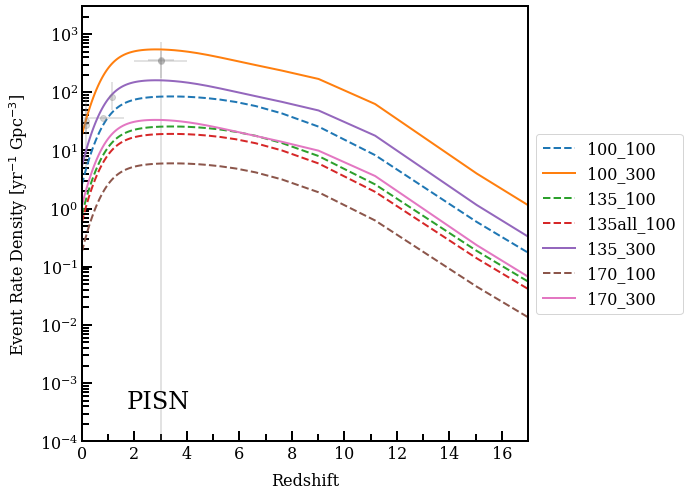

In [25]:
plt.figure(figsize=(8, 8))
plt.xlim(0, 17)
plt.ylim(3e1, 5e6)
plt.yscale('log')
plt.ylabel(r"Event Rate Density [yr$^{-1}$ Gpc$^{-3}$]", labelpad=10)
plt.xlabel('Redshift', labelpad=10)

ax = plt.gca()
set_plot_params(ax)


plt.plot(empmodel_100_100['redshift_edges'][:-1], empmodel_100_100['PISN_rates'], '--', label='100_100', lw=2)
plt.plot(empmodel_100_300['redshift_edges'][:-1], empmodel_100_300['PISN_rates'], label='100_300', lw=2)
plt.plot(empmodel_135_100['redshift_edges'][:-1], empmodel_135_100['PISN_rates'], '--', label='135_100', lw=2)
plt.plot(empmodel_135all_100['redshift_edges'][:-1], empmodel_135all_100['PISN_rates'], '--', label='135all_100', lw=2)
plt.plot(empmodel_135_300['redshift_edges'][:-1], empmodel_135_300['PISN_rates'], label='135_300', lw=2)
plt.plot(empmodel_170_100['redshift_edges'][:-1], empmodel_170_100['PISN_rates'], '--', label='170_100', lw=2)
plt.plot(empmodel_170_300['redshift_edges'][:-1], empmodel_170_300['PISN_rates'], label='170_300', lw=2)




ax.errorbar(
            np.array(obs_PISN['mean_z']),
            np.array(obs_PISN['rate']) * h**3,
            xerr= [obs_PISN['lower_z'], obs_PISN['upper_z']],
            yerr=[obs_PISN['lower_rate'] * h**3, obs_PISN['upper_rate'] * h**3],
            fmt="o",
            ms=6,
            alpha=0.3,
            color= 'grey'
    )


plt.legend( loc='center left', bbox_to_anchor=(1, 0.5))

ax.text(0.1, 0.075, "PISN", transform=ax.transAxes,fontsize=24)

plt.ylim(1e-4, 3e3)

plt.show()

In [205]:
peak_100_100 = empmodel_100_100['redshift_edges'][:-1][np.argmax(empmodel_100_100['PISN_rates'])]
peak_100_300 = empmodel_100_300['redshift_edges'][:-1][np.argmax(empmodel_100_300['PISN_rates'])]
peak_135_100 = empmodel_135_100['redshift_edges'][:-1][np.argmax(empmodel_135_100['PISN_rates'])]
peak_135all_100 = empmodel_135all_100['redshift_edges'][:-1][np.argmax(empmodel_135all_100['PISN_rates'])]
peak_135_300 = empmodel_135_300['redshift_edges'][:-1][np.argmax(empmodel_135_300['PISN_rates'])]
peak_170_100 = empmodel_170_100['redshift_edges'][:-1][np.argmax(empmodel_170_100['PISN_rates'])]
peak_170_300 = empmodel_170_300['redshift_edges'][:-1][np.argmax(empmodel_170_300['PISN_rates'])]

print(f"Peak for 100_100: {peak_100_100}")
print(f"Peak for 100_300: {peak_100_300}")
print(f"Peak for 135_100: {peak_135_100}")
print(f"Peak for 135all_100: {peak_135all_100}")
print(f"Peak for 135_300: {peak_135_300}")
print(f"Peak for 170_100: {peak_170_100}")
print(f"Peak for 170_300: {peak_170_300}")


Peak for 100_100: 3.3053766394572954
Peak for 100_300: 2.775537281909773
Peak for 135_100: 3.526188241850716
Peak for 135all_100: 3.526188241850716
Peak for 135_300: 2.775537281909773
Peak for 170_100: 3.526188241850716
Peak for 170_300: 2.775537281909773


In [206]:
average_peak_redshift = np.mean([
    peak_100_100, peak_100_300, peak_135_100,
    peak_135all_100, peak_135_300, peak_170_100, peak_170_300
])

print(f"Average Peak Redshift: {average_peak_redshift}")

Average Peak Redshift: 3.17293617296268


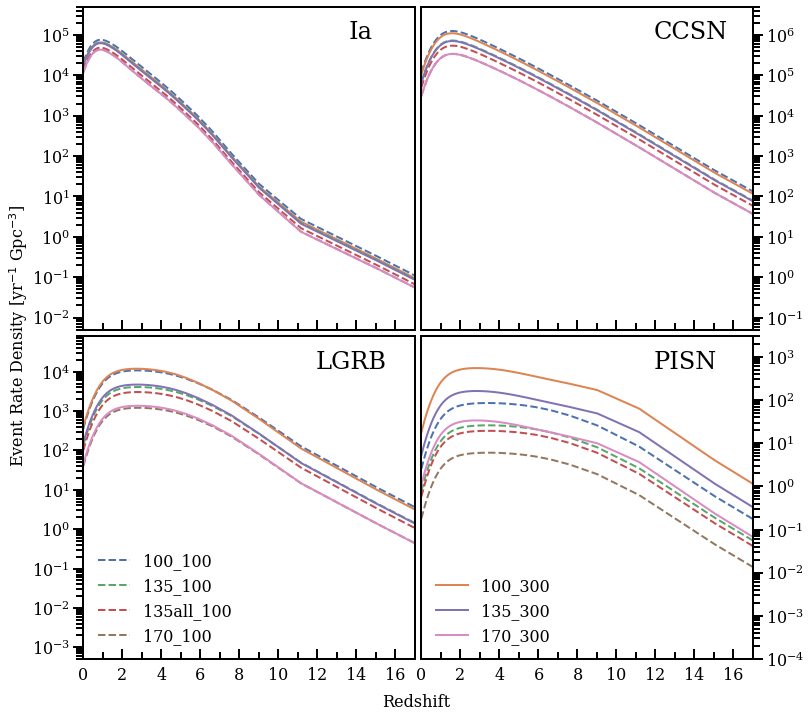

In [215]:
fig, axes = plt.subplots(2,2, figsize=(12,12))
fig.subplots_adjust(wspace=0.02, hspace = 0.02)

axs = axes.flatten()

for ax in axs:
    ax.set_yscale('log')
    ax.set_xlim(0, 17)
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='out')
    ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='out')
    
    ax.xaxis.set_tick_params(which='major', size=10, width=2, direction='in', pad=7)
    ax.xaxis.set_tick_params(which='minor', size=7, width=2, direction='in')
    ax.yaxis.set_major_locator(mpl.ticker.LogLocator(base=10, numticks=10))
    major_locator = ticker.MultipleLocator(base=2)
    minor_locator = ticker.MultipleLocator(base=1)
    ax.xaxis.set_major_locator(major_locator)
    ax.xaxis.set_minor_locator(minor_locator)
    ax.set_xticks(ax.get_xticks()[1:-1])
    ax.set_xticklabels([str(int(x)) for x in ax.get_xticks()])


for ax in axs[0:1]:
    
    ax.plot(empmodel_100_100['redshift_edges'][:-1], empmodel_100_100['Ia_rates'], '--', label='100_100', lw=2)
    ax.plot(empmodel_100_300['redshift_edges'][:-1], empmodel_100_300['Ia_rates'], label='100_300', lw=2)
    ax.plot(empmodel_135_100['redshift_edges'][:-1], empmodel_135_100['Ia_rates'], '--', label='135_100', lw=2)
    ax.plot(empmodel_135all_100['redshift_edges'][:-1], empmodel_135all_100['Ia_rates'], '--', label='135all_100', lw=2)
    ax.plot(empmodel_135_300['redshift_edges'][:-1], empmodel_135_300['Ia_rates'], label='135_300', lw=2)
    ax.plot(empmodel_170_100['redshift_edges'][:-1], empmodel_170_100['Ia_rates'], '--', label='170_100', lw=2)
    ax.plot(empmodel_170_300['redshift_edges'][:-1], empmodel_170_300['Ia_rates'], label='170_300', lw=2)


    
    
    
    #ax.errorbar(
            #np.array(obs_Ia['mean_z']),
            #np.array(obs_Ia['rate']) * h**3,
            #xerr= [obs_Ia['lower_z'], obs_Ia['upper_z']],
            #yerr=[obs_Ia['lower_rate'] * h**3, obs_Ia['upper_rate'] * h**3],
            #fmt="o",
            #ms=6,
            #alpha=0.3,
            #color= 'grey'
    #)
    ax.xaxis.set_major_formatter(mpl.ticker.NullFormatter())
    ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    
    ax.yaxis.set_tick_params(which='major', size=10, width=2, direction='out')
    ax.yaxis.set_tick_params(which='minor', size=7, width=2, direction='out')
    minor_locator = ticker.LogLocator(base=10.0, subs=np.arange(2, 10) * 0.1, numticks=10)
    ax.yaxis.set_minor_locator(minor_locator)

    ax.text(0.8, 0.9, "Ia", transform=ax.transAxes,fontsize=24)
    #ax.legend(loc = 'lower left', frameon = False)
    ax.set_ylim(5e-3, 5e5)
    
for ax in axs[1:2]:
    ax.plot(empmodel_100_100['redshift_edges'][:-1], empmodel_100_100['CCSN_rates'], '--', label='100_100', lw=2)
    ax.plot(empmodel_100_300['redshift_edges'][:-1], empmodel_100_300['CCSN_rates'], label='100_300', lw=2)
    ax.plot(empmodel_135_100['redshift_edges'][:-1], empmodel_135_100['CCSN_rates'], '--', label='135_100', lw=2)
    ax.plot(empmodel_135all_100['redshift_edges'][:-1], empmodel_135all_100['CCSN_rates'], '--', label='135all_100', lw=2)
    ax.plot(empmodel_135_300['redshift_edges'][:-1], empmodel_135_300['CCSN_rates'], label='135_300', lw=2)
    ax.plot(empmodel_170_100['redshift_edges'][:-1], empmodel_170_100['CCSN_rates'], '--', label='170_100', lw=2)
    ax.plot(empmodel_170_300['redshift_edges'][:-1], empmodel_170_300['CCSN_rates'], label='170_300', lw=2)

    
    

    
    
    #ax.errorbar(
            #np.array(obs_CCSN['mean_z']),
            #np.array(obs_CCSN['rate']) * h**3,
            #xerr= [obs_CCSN['lower_z'], obs_CCSN['upper_z']],
            #yerr=[obs_CCSN['lower_rate'] * h**3, obs_CCSN['upper_rate'] * h**3],
            #fmt="o",
            #ms=6,
            #alpha=0.3,
            #color= 'grey'
    #)
    ax.xaxis.set_major_formatter(mpl.ticker.NullFormatter())
    ax.xaxis.set_minor_formatter(mpl.ticker.NullFormatter())
    ax.yaxis.tick_right()
    ax.tick_params(axis='y', which='both')
    
    ax.text(0.7, 0.9, "CCSN", transform=ax.transAxes,fontsize=24)
    #ax.legend(loc = 'lower left', frameon = False)
    
    ax.set_ylim(5e-2, 5e6)
    
for ax in axs[2:3]:
    ax.plot(empmodel_100_100['redshift_edges'][:-1], empmodel_100_100['LGRB_rates'], '--', label='100_100', lw=2)
    ax.plot(empmodel_100_300['redshift_edges'][:-1], empmodel_100_300['LGRB_rates'], lw=2)
    ax.plot(empmodel_135_100['redshift_edges'][:-1], empmodel_135_100['LGRB_rates'], '--', label='135_100', lw=2)
    ax.plot(empmodel_135all_100['redshift_edges'][:-1], empmodel_135all_100['LGRB_rates'], '--', label='135all_100', lw=2)
    ax.plot(empmodel_135_300['redshift_edges'][:-1], empmodel_135_300['LGRB_rates'], lw=2)
    ax.plot(empmodel_170_100['redshift_edges'][:-1], empmodel_170_100['LGRB_rates'], '--', label='170_100', lw=2)
    ax.plot(empmodel_170_300['redshift_edges'][:-1], empmodel_170_300['LGRB_rates'], lw=2)
    

    
    #ax.errorbar(
            #np.array(obs_LGRB['mean_z']),
            #np.array(obs_LGRB['rate']) * h**3,
            #xerr= [obs_LGRB['lower_z'], obs_LGRB['upper_z']],
            #yerr=[obs_LGRB['lower_rate'] * h**3, obs_LGRB['upper_rate'] * h**3],
            #fmt="o",
            #ms=6,
            #alpha=0.3,
            #color= 'grey'
    #)
    
    ax.text(0.7, 0.9, "LGRB", transform=ax.transAxes,fontsize=24)
    ax.legend(loc = 'lower left', frameon = False)
    
    ax.set_ylim(5e-4, 8e4)
    
for ax in axs[3:4]:
    ax.plot(empmodel_100_100['redshift_edges'][:-1], empmodel_100_100['PISN_rates'], '--', lw=2)
    ax.plot(empmodel_100_300['redshift_edges'][:-1], empmodel_100_300['PISN_rates'], label = '100_300',  lw=2)
    ax.plot(empmodel_135_100['redshift_edges'][:-1], empmodel_135_100['PISN_rates'], '--', lw=2)
    ax.plot(empmodel_135all_100['redshift_edges'][:-1], empmodel_135all_100['PISN_rates'], '--', lw=2)
    ax.plot(empmodel_135_300['redshift_edges'][:-1], empmodel_135_300['PISN_rates'], label='135_300', lw=2)
    ax.plot(empmodel_170_100['redshift_edges'][:-1], empmodel_170_100['PISN_rates'], '--', lw=2)
    ax.plot(empmodel_170_300['redshift_edges'][:-1], empmodel_170_300['PISN_rates'], label='170_300', lw=2)

    
    
    #ax.errorbar(
            #np.array(obs_PISN['mean_z']),
            #np.array(obs_PISN['rate']) * h**3,
            #xerr= [obs_PISN['lower_z'], obs_PISN['upper_z']],
            #yerr=[obs_PISN['lower_rate'] * h**3, obs_PISN['upper_rate'] * h**3],
            #fmt="o",
            #ms=6,
            #alpha=0.3,
            #color= 'grey'
    #)
    
    ax.yaxis.tick_right()
    ax.tick_params(axis='y', which='both')
    ax.text(0.7, 0.9, "PISN", transform=ax.transAxes,fontsize=24)
    ax.legend(loc = 'lower left', frameon = False)
    ax.set_ylim(1e-4, 3e3)
    
fig.text(0.05, 0.5, r"Event Rate Density [yr$^{-1}$ Gpc$^{-3}$]", ha="center", va="center", rotation="vertical")
fig.text(0.51, 0.075, "Redshift", ha="center", va="center")

#plt.tight_layout()

plt.savefig('/Users/dillon/Desktop/EmpModel All IMFs', bbox_inches='tight') 

### Differences

##### Ia

In [201]:
a = 0
b = 17  

redshifts = empmodel_100_100['redshift_edges'][:-1]

selected_indices = np.where((redshifts >= a) & (redshifts <= b))[0]

max_ratio = 0
max_ratio_redshift = None
max_ratio_models = None
max_ratio_y_values = None

models = [empmodel_100_100['Ia_rates'], empmodel_100_300['Ia_rates'], empmodel_135_100['Ia_rates'], empmodel_135all_100['Ia_rates'], empmodel_135_300['Ia_rates'], empmodel_170_100['Ia_rates'], empmodel_170_300['Ia_rates']]
model_names = ["100_100", "100_300", "135_100", "135all_100", "135_300", "170_100", "170_300"]

for i in selected_indices:
    for j in range(len(models)):
        for k in range(j+1, len(models)):
            ratio = np.abs(models[j][i] - models[k][i]) / min(models[j][i], models[k][i])
            
            if ratio > max_ratio:
                max_ratio = ratio
                max_ratio_redshift = redshifts[i]
                max_ratio_models = [model_names[j], model_names[k]]
                max_ratio_y_values = [models[j][i], models[k][i]]

print(f"The maximum ratio ({max_ratio}) occurs at redshift {max_ratio_redshift}.")
print(f"The ratio comes from the models: {max_ratio_models[0]} and {max_ratio_models[1]}.")
print(f"The y-values for {max_ratio_models[0]} and {max_ratio_models[1]} are {max_ratio_y_values[0]} and {max_ratio_y_values[1]}.")


The maximum ratio (1.08356611695327) occurs at redshift 11.167806663976043.
The ratio comes from the models: 100_100 and 170_300.
The y-values for 100_100 and 170_300 are 2.7660830804123027 and 1.3275715408815798.


##### CCSN

In [200]:
a = 0
b = 17  

redshifts = empmodel_100_100['redshift_edges'][:-1]

selected_indices = np.where((redshifts >= a) & (redshifts <= b))[0]

max_ratio = 0
max_ratio_redshift = None
max_ratio_models = None
max_ratio_y_values = None

models = [empmodel_100_100['CCSN_rates'], empmodel_100_300['CCSN_rates'], empmodel_135_100['CCSN_rates'], empmodel_135all_100['CCSN_rates'], empmodel_135_300['CCSN_rates'], empmodel_170_100['CCSN_rates'], empmodel_170_300['CCSN_rates']]
model_names = ["100_100", "100_300", "135_100", "135all_100", "135_300", "170_100", "170_300"]

for i in selected_indices:
    for j in range(len(models)):
        for k in range(j+1, len(models)):
            ratio = np.abs(models[j][i] - models[k][i]) / min(models[j][i], models[k][i])
            
            if ratio > max_ratio:
                max_ratio = ratio
                max_ratio_redshift = redshifts[i]
                max_ratio_models = [model_names[j], model_names[k]]
                max_ratio_y_values = [models[j][i], models[k][i]]

print(f"The maximum ratio ({max_ratio}) occurs at redshift {max_ratio_redshift}.")
print(f"The ratio comes from the models: {max_ratio_models[0]} and {max_ratio_models[1]}.")
print(f"The y-values for {max_ratio_models[0]} and {max_ratio_models[1]} are {max_ratio_y_values[0]} and {max_ratio_y_values[1]}.")


The maximum ratio (2.8122066423908896) occurs at redshift 1.5054601594530295e-08.
The ratio comes from the models: 100_100 and 170_300.
The y-values for 100_100 and 170_300 are 118497.95313668631 and 31083.82211473414.


##### LGRB

In [202]:
a = 0
b = 17  

redshifts = empmodel_100_100['redshift_edges'][:-1]

selected_indices = np.where((redshifts >= a) & (redshifts <= b))[0]

max_ratio = 0
max_ratio_redshift = None
max_ratio_models = None
max_ratio_y_values = None

models = [empmodel_100_100['LGRB_rates'], empmodel_100_300['LGRB_rates'], empmodel_135_100['LGRB_rates'], empmodel_135all_100['LGRB_rates'], empmodel_135_300['LGRB_rates'], empmodel_170_100['LGRB_rates'], empmodel_170_300['LGRB_rates']]
model_names = ["100_100", "100_300", "135_100", "135all_100", "135_300", "170_100", "170_300"]

for i in selected_indices:
    for j in range(len(models)):
        for k in range(j+1, len(models)):
            ratio = np.abs(models[j][i] - models[k][i]) / min(models[j][i], models[k][i])
            
            if ratio > max_ratio:
                max_ratio = ratio
                max_ratio_redshift = redshifts[i]
                max_ratio_models = [model_names[j], model_names[k]]
                max_ratio_y_values = [models[j][i], models[k][i]]

print(f"The maximum ratio ({max_ratio}) occurs at redshift {max_ratio_redshift}.")
print(f"The ratio comes from the models: {max_ratio_models[0]} and {max_ratio_models[1]}.")
print(f"The y-values for {max_ratio_models[0]} and {max_ratio_models[1]} are {max_ratio_y_values[0]} and {max_ratio_y_values[1]}.")


The maximum ratio (9.009577369501558) occurs at redshift 1.5054601594530295e-08.
The ratio comes from the models: 100_300 and 170_100.
The y-values for 100_300 and 170_100 are 397.18511102367853 and 39.68050761402496.


##### PISN

In [203]:
a = 0
b = 17  

redshifts = empmodel_100_100['redshift_edges'][:-1]

selected_indices = np.where((redshifts >= a) & (redshifts <= b))[0]

max_ratio = 0
max_ratio_redshift = None
max_ratio_models = None
max_ratio_y_values = None

models = [empmodel_100_100['PISN_rates'], empmodel_100_300['PISN_rates'], empmodel_135_100['PISN_rates'], empmodel_135all_100['PISN_rates'], empmodel_135_300['PISN_rates'], empmodel_170_100['PISN_rates'], empmodel_170_300['PISN_rates']]
model_names = ["100_100", "100_300", "135_100", "135all_100", "135_300", "170_100", "170_300"]

for i in selected_indices:
    for j in range(len(models)):
        for k in range(j+1, len(models)):
            ratio = np.abs(models[j][i] - models[k][i]) / min(models[j][i], models[k][i])
            
            if ratio > max_ratio:
                max_ratio = ratio
                max_ratio_redshift = redshifts[i]
                max_ratio_models = [model_names[j], model_names[k]]
                max_ratio_y_values = [models[j][i], models[k][i]]

print(f"The maximum ratio ({max_ratio}) occurs at redshift {max_ratio_redshift}.")
print(f"The ratio comes from the models: {max_ratio_models[0]} and {max_ratio_models[1]}.")
print(f"The y-values for {max_ratio_models[0]} and {max_ratio_models[1]} are {max_ratio_y_values[0]} and {max_ratio_y_values[1]}.")


The maximum ratio (99.51203764860131) occurs at redshift 11.167806663976043.
The ratio comes from the models: 100_300 and 170_100.
The y-values for 100_300 and 170_100 are 62.925896694439366 and 0.6260533381527265.
